In [13]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

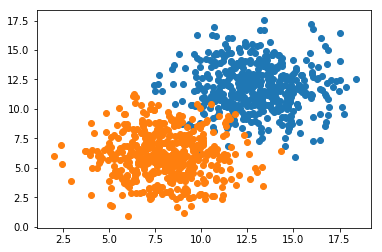

In [14]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])


In [16]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation='sigmoid'))
adam=Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y, verbose=1, batch_size=50,epochs=500,shuffle='true')

Epoch 1/500
1000/1000 [==============================] - 0s 124us/step - loss: 1.0564 - acc: 0.4730
Epoch 2/500
1000/1000 [==============================] - 0s 36us/step - loss: 0.5240 - acc: 0.7780
Epoch 3/500
1000/1000 [==============================] - 0s 34us/step - loss: 0.3825 - acc: 0.8960
Epoch 4/500
1000/1000 [==============================] - 0s 37us/step - loss: 0.3307 - acc: 0.9070
Epoch 5/500
1000/1000 [==============================] - 0s 33us/step - loss: 0.2883 - acc: 0.9310
Epoch 6/500
1000/1000 [==============================] - 0s 33us/step - loss: 0.2539 - acc: 0.9470
Epoch 7/500
1000/1000 [==============================] - 0s 39us/step - loss: 0.2314 - acc: 0.9530
Epoch 8/500
1000/1000 [==============================] - 0s 34us/step - loss: 0.2072 - acc: 0.9630
Epoch 9/500
1000/1000 [==============================] - 0s 36us/step - loss: 0.1951 - acc: 0.9670
Epoch 10/500
1000/1000 [==============================] - 0s 37us/step - loss: 0.1811 - acc: 0.9600
Epoch 11

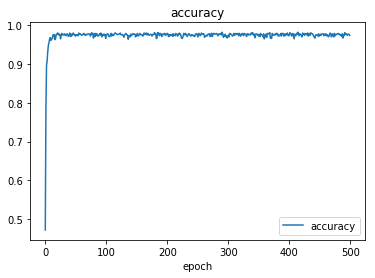

In [17]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

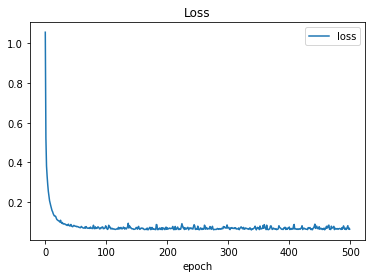

In [18]:
plt.plot(h.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [44]:
def plot_descision_boundry(X, y, model):
    x_span= np.linspace(min(X[:,0])-1, max(X[:,0])+1,50)
    y_span=np.linspace(min(X[:,1])-1,max(X[:,1])+1,50)
    xx,yy=np.meshgrid(x_span,y_span)
    xx_,yy_=xx.ravel(),yy.ravel()
    grid=np.c_[xx_,yy_]
    pred_func=model.predict(grid)
    z=pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

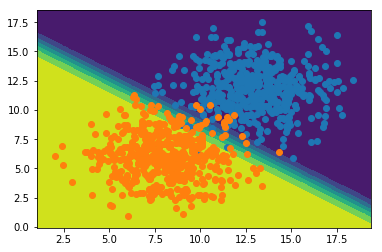

In [46]:
plot_descision_boundry(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

[[5.1380372e-11]]


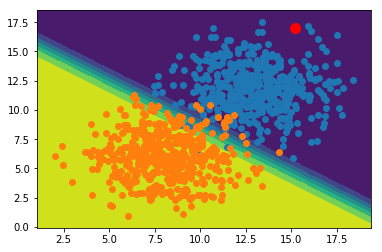

In [49]:
plot_descision_boundry(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
x=15.2
y=17
point=np.array([[x,y]])
prediction=model.predict(point)
plt.plot([x],[y],marker='o',markersize=10,color='red')
print(prediction)